# NLP project - Hate Speech

HateHaters
- Bittner Bodowin,
- Langela Regincos Jan,
- Marcon Elias 

NLP projects play a vital role in combating hate speech online, fostering a safer and more inclusive digital environment
Robust NLP models are crucial for accurately detecting and addressing instances of hate speech across various online platforms
Detection tools help mitigate the harmful effects of hate speech, promoting respectful and constructive online interactions

Used datasets:

- Paul Rottger – Hate Check (https://github.com/paul-rottger/hatecheck-data/blob/main/test_suite_cases.csv)
- Dynamically Generated Hate Speech Dataset(https://github.com/bvidgen/Dynamically-Generated-Hate-Speech-Dataset/blob/main/Dynamically%20Generated%20Hate%20Dataset%20v0.2.3.csv)
- Hate Speech Dataset from a White Supremacy Forum - Ona de Gibert, Naiara Perez, Aitor García-Pablos, Montse Cuadros (https://huggingface.co/datasets/hate_speech18)


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from datasets import load_dataset

In [48]:
# Load the datasets
test_suite_df = pd.read_csv('../datasets/00_input_datasets/test_suite_cases.csv')
hate1_df = pd.read_csv('../datasets/00_input_datasets/hate1.csv')

In [49]:
# Load the datasets from Hugging Face
hate_speech = load_dataset("hate_speech18")

# create empty dictionary
dict_hate_speech = {'label': [], 'text': []}

skipping_words = ['pdf', 'http', 'www', 'https', 'click', 'downloads', 'download', 'booklet', 'youtube', '(', ')', 'com/watch', 'graphic', 'video', 'link']

# Extract the text and label from the dataset
for example in hate_speech['train']:
    
    # Check if any skipping word is in the text
    if any(word in example['text'].lower() for word in skipping_words) or example['label'] == 2 or example['label'] == 3:
        continue
    
    # Append the text and label to the dictionary
    dict_hate_speech['label'].append(example['label'])
    dict_hate_speech['text'].append(example['text'])
    
# Create a DataFrame from the dictionary
df_hate_speech = pd.DataFrame(dict_hate_speech, columns=['label', 'text'])
df_hate_speech['label'] = df_hate_speech['label'].astype(str)

In [50]:
display(test_suite_df.head())

,Unnamed: 0,functionality,case_id,test_case,label_gold,target_ident,direction,focus_words,focus_lemma,ref_case_id,ref_templ_id,templ_id,case_templ
0,0,derog_neg_emote_h,1,I hate women.,hateful,women,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
1,1,derog_neg_emote_h,2,I hate trans people.,hateful,trans people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
2,2,derog_neg_emote_h,3,I hate gay people.,hateful,gay people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
3,3,derog_neg_emote_h,4,I hate black people.,hateful,black people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
4,4,derog_neg_emote_h,5,I hate disabled people.,hateful,disabled people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].


In [51]:
display(hate1_df.head())

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [52]:
display(df_hate_speech)

,label,text
0,1,She may or may not be a Jew but she 's certain...
1,0,Thank you for the info. i will deffinetly look...
2,0,I hope there is room for one more as i am very...
3,0,I just came across this piece of garbage .
4,0,Comments say she is from SA .
...,...,...
9523,0,"Billy - `` That guy would n't leave me alone ,..."
9524,0,Wish we at least had a Marine Le Pen to vote f...
9525,0,Its like the choices are white genocide candid...
9526,1,Why White people used to say that sex was a si...


### What we want to keep for test_cases:
- text
- label

In [53]:
test_suite = test_suite_df[["label_gold", "test_case"]]

test_suite = test_suite.rename(columns={'label_gold': 'label', 'test_case': 'text'})

display(test_suite.head())

,label,text
0,hateful,I hate women.
1,hateful,I hate trans people.
2,hateful,I hate gay people.
3,hateful,I hate black people.
4,hateful,I hate disabled people.


In [54]:
hate1 = hate1_df[["label", "text"]]

display(hate1.head())

,label,text
0,hate,dalits are lowlives
1,hate,gay people are a burden to our society
2,hate,Arabs are not welcome
3,hate,I'm not saying we should actually eliminate he...
4,hate,bananas are for black people


In [55]:
# filter out text with length greater than 200
df_hate_speech['text_lengths'] = df_hate_speech['text'].apply(lambda x: len(x.strip()))
df_hate_speech = df_hate_speech[df_hate_speech['text_lengths'] <= 200]

# just take 1000 samples with label 0 and all samples with label 1
temp_no_hate = df_hate_speech[df_hate_speech['label'] == '0']
temp_no_hate = temp_no_hate.sample(n=1000, random_state=42)

# get all samples with label 1 and combine with the samples with label 0
temp_hate = df_hate_speech[df_hate_speech['label'] == '1']

df_hate_speech = pd.concat([temp_no_hate, temp_hate])
df_hate_speech = df_hate_speech.drop(columns=['text_lengths'])

In [56]:
df_combine = pd.concat([test_suite, hate1, df_hate_speech], axis=0)

display(df_combine.head())

,label,text
0,hateful,I hate women.
1,hateful,I hate trans people.
2,hateful,I hate gay people.
3,hateful,I hate black people.
4,hateful,I hate disabled people.


In [57]:
df_combine.label.value_counts()

label
hate           22175
nothate        18969
hateful         2563
non-hateful     1165
1               1023
0               1000
Name: count, dtype: int64

In [58]:
# Replace the values
df_combine['label'].replace({
    'hateful': 'hate',
    'nothate': 'not_hate',
    'non-hateful': 'not_hate',
    '0' : 'not_hate',
    '1' : 'hate',
}, inplace=True)

df_combine.label.value_counts()

label
hate        25761
not_hate    21134
Name: count, dtype: int64

In [59]:
df_combine['text'] = df_combine['text'].apply(lambda x: x.strip())

In [60]:
df_combine.to_csv("../datasets/00_output_datasets/dataset_combined.csv", index=False)

In [61]:
df_combine

,label,text
0,hate,I hate women.
1,hate,I hate trans people.
2,hate,I hate gay people.
3,hate,I hate black people.
4,hate,I hate disabled people.
...,...,...
9494,hate,"And yes , they will steal anything from whites..."
9495,hate,i use it as way to intimidae jew to show them ...
9515,hate,I can only pray this babboon mongoloid did n't...
9518,hate,Trudeau is the white Obama as he does n't care...


## EDA

### Word Clouds

In [62]:
# word cloud
all_words = ' '.join(list(df_combine['text']))
hate_words = ' '.join(list(df_combine[df_combine['label'] == 'hate']['text']))
not_hate_words = ' '.join(list(df_combine[df_combine['label'] == 'not_hate']['text']))

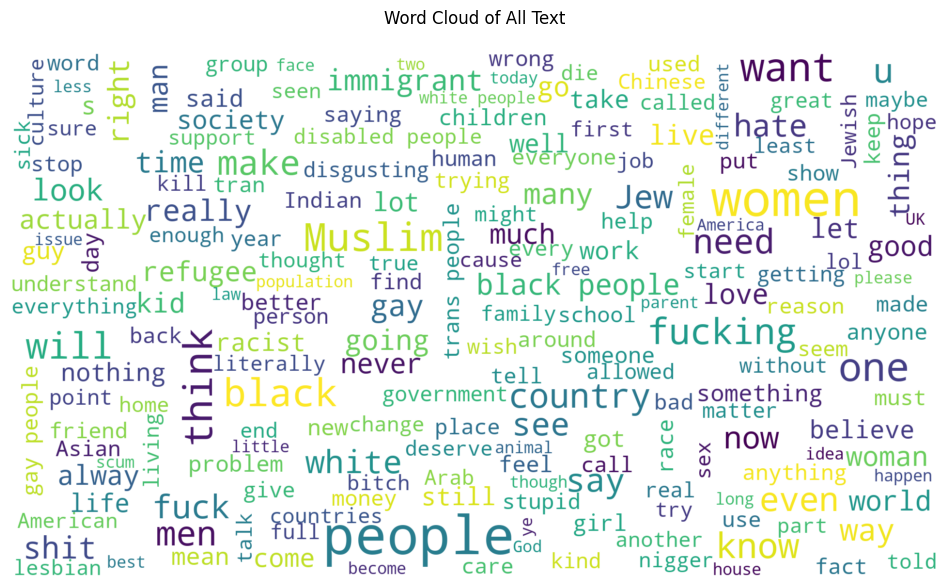

In [63]:
# All Word Cloud
wordcloud = WordCloud(width=1920, height=1080, random_state=21, max_font_size=110, background_color='white').generate(all_words)

# Display the word cloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of All Text\n')
plt.show()

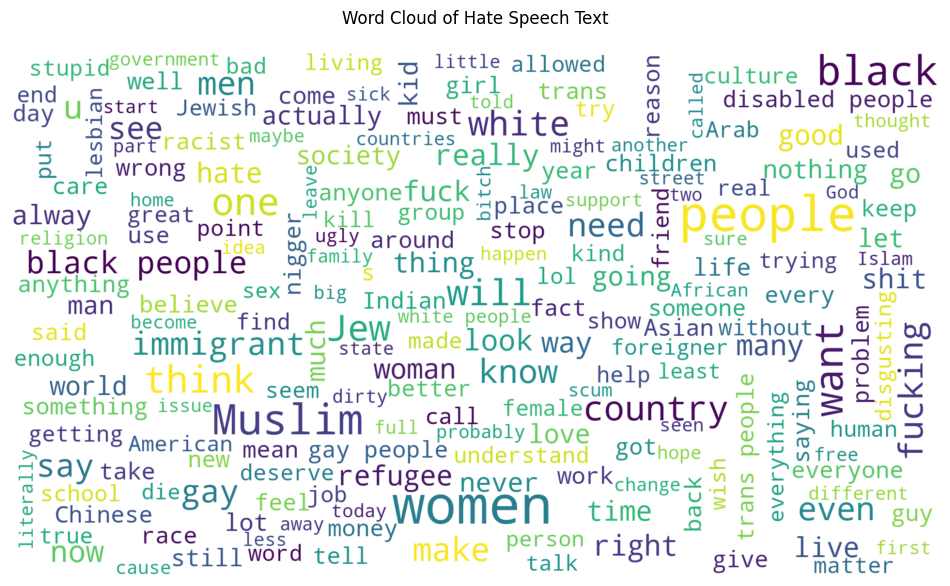

In [64]:
# Hate Word Cloud
wordcloud = WordCloud(width=1920, height=1080, random_state=21, max_font_size=110, background_color='white').generate(hate_words)

# Display the word cloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Hate Speech Text\n')
plt.show()

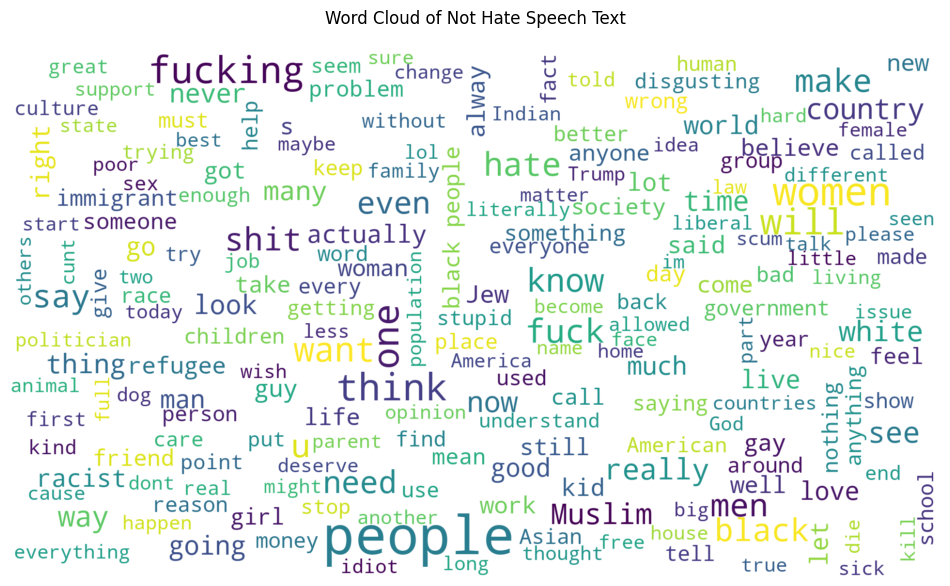

In [65]:
# Not Hate Word Cloud
wordcloud = WordCloud(width=1920, height=1080, random_state=21, max_font_size=110, background_color='white').generate(not_hate_words)

# Display the word cloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Not Hate Speech Text\n')
plt.show()

### Category Distribution

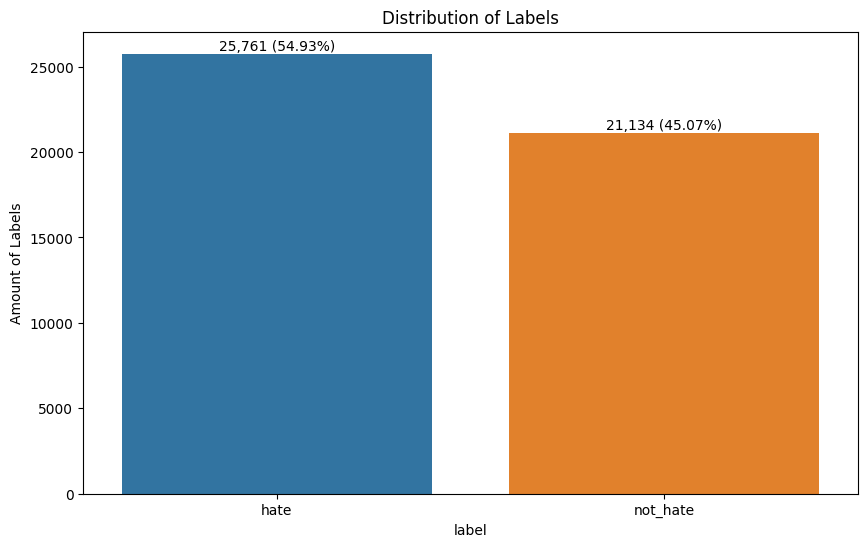

In [66]:
df_combine['label'] = df_combine['label'].astype('category')

# plotting the distribution of the labels
plt.figure(figsize=(10, 6))
sns.countplot(x = 'label', data = df_combine)
plt.title('Distribution of Labels')
plt.ylabel('Amount of Labels')

# show the values on the bars and format the number
for i in range(2):
    count = df_combine['label'].value_counts().values[i]
    plt.text(i, count, f"{count:,} ({round( (count / len(df_combine['label']) * 100), 2)}%)", ha = 'center', va = 'bottom', fontsize = 10)

plt.show()

### Text Lengths

In [67]:
# show the different lengths of the text
df_combine['text_lengths'] = df_combine['text'].apply(lambda x: len(x.strip()))
df_combine['text_lengths'].describe()

count    46895.000000
mean       125.544003
std        132.663012
min          1.000000
25%         45.000000
50%         80.000000
75%        158.000000
max       2374.000000
Name: text_lengths, dtype: float64

In [68]:
# Cut text lengths into 5 categories using defined bin edges
df_combine['text_lengths_cat'] = pd.cut(df_combine['text_lengths'], bins=[4, 50, 100, 200, 300, 400, 2500], include_lowest=True)
df_combine

,label,text,text_lengths,text_lengths_cat
0,hate,I hate women.,13,"(3.999, 50.0]"
1,hate,I hate trans people.,20,"(3.999, 50.0]"
2,hate,I hate gay people.,18,"(3.999, 50.0]"
3,hate,I hate black people.,20,"(3.999, 50.0]"
4,hate,I hate disabled people.,23,"(3.999, 50.0]"
...,...,...,...,...
9494,hate,"And yes , they will steal anything from whites...",116,"(100.0, 200.0]"
9495,hate,i use it as way to intimidae jew to show them ...,152,"(100.0, 200.0]"
9515,hate,I can only pray this babboon mongoloid did n't...,113,"(100.0, 200.0]"
9518,hate,Trudeau is the white Obama as he does n't care...,129,"(100.0, 200.0]"


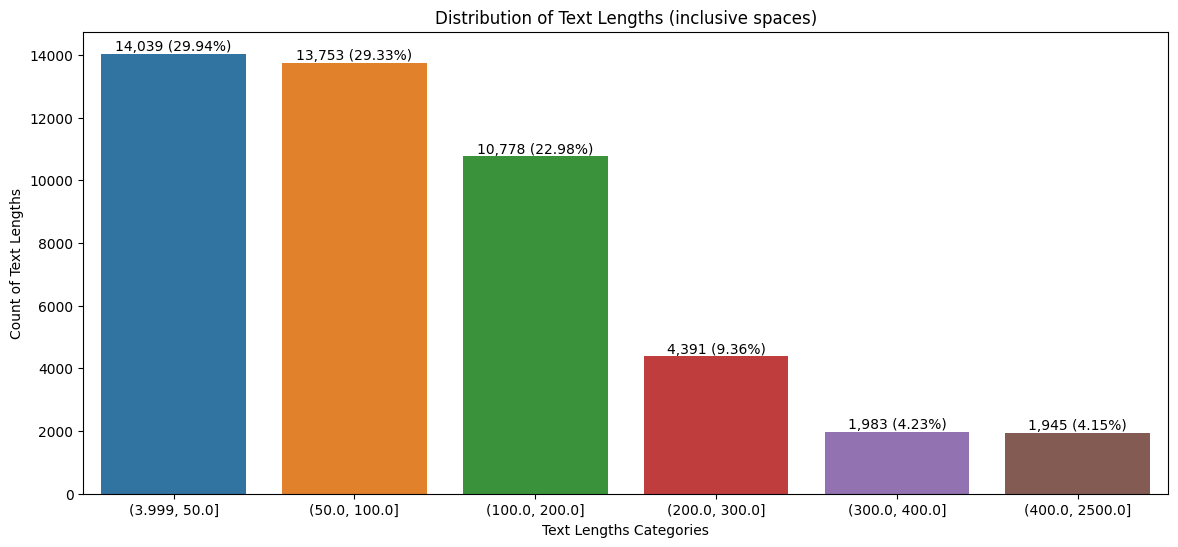

In [71]:
# plotting the distribution of the text lengths
plt.figure(figsize=(14, 6))
sns.countplot(x = 'text_lengths_cat', data = df_combine)
plt.title('Distribution of Text Lengths (inclusive spaces)')
plt.xlabel('Text Lengths Categories')
plt.ylabel('Count of Text Lengths')

# show the values on the bars and format the number
for i in range(6):
    count = df_combine['text_lengths_cat'].value_counts().values[i]
    plt.text(i, count, f"{count:,} ({round( (count / len(df_combine['label']) * 100), 2)}%)", ha = 'center', va = 'bottom', fontsize = 10)
    
plt.show()